In [3]:
# Importing all the libraries I am using
import numpy as np
import pandas as pd
import os #We import os in order to change/specify our working directory.
import plotly.express as px #interractive boxplot
import matplotlib.pyplot as plt 
import seaborn as sb # visualization extension
#import bokeh.io # for more visual demonstration
#import bokeh.models #for more visual demonstration
#import bokeh.plotting #for more visual demonstration


In [4]:
os.getcwd()

'C:\\Users\\Charlotte Ahrens\\Documents\\Documents\\GitHub\\class_robotics'

In [56]:
os.chdir(r"C:\Users\Charlotte Ahrens\Documents\Documents\GitHub\class_robotics")

In [57]:
url = r"C:\Users\Charlotte Ahrens\Documents\Documents\GitHub\class_robotics\China_robotics_data.csv"
data = pd.read_csv(url)
type(data)

pandas.core.frame.DataFrame

In [58]:
data.head()

,Period,Trade Flow,Reporter,Partner,2nd Partner,Customs Desc,Transport Mode,Commodity Code,Trade Value,Net Weight(kg),Gross Weight,Qty Unit,Qty,Alternate Quantity unit,Alternate Quantity
0,2004,M,European Union,World,World,TOTAL CPC,TOTAL MOT,850131,464236771,25556300.0,NaN,u,99401701.0,NaN,NaN
1,2004,X,European Union,World,World,TOTAL CPC,TOTAL MOT,850131,376072131,17238312.0,NaN,u,15528260.0,NaN,NaN
2,2004,M,European Union,China,World,TOTAL CPC,TOTAL MOT,850131,128609541,12554300.0,NaN,u,84372230.0,NaN,NaN
3,2004,X,European Union,China,World,TOTAL CPC,TOTAL MOT,850131,30004437,1757400.0,NaN,u,1996996.0,NaN,NaN
4,2004,M,European Union,Japan,World,TOTAL CPC,TOTAL MOT,850131,106810031,6111865.0,NaN,u,5121194.0,NaN,NaN


In [8]:
data.describe

<bound method NDFrame.describe of      Period Trade Flow        Reporter Partner 2nd Partner Customs Desc  \
0      2004          M  European Union   World       World    TOTAL CPC   
1      2004          X  European Union   World       World    TOTAL CPC   
2      2004          M  European Union   China       World    TOTAL CPC   
3      2004          X  European Union   China       World    TOTAL CPC   
4      2004          M  European Union   Japan       World    TOTAL CPC   
..      ...        ...             ...     ...         ...          ...   
980    2021          X             USA   World       World    TOTAL CPC   
981    2021          M             USA   China       World    TOTAL CPC   
982    2021          X             USA   China       World    TOTAL CPC   
983    2021          M             USA   Japan       World    TOTAL CPC   
984    2021          X             USA   Japan       World    TOTAL CPC   

    Transport Mode  Commodity Code  Trade Value  Net Weight(kg)  

In [9]:
print(data["Trade Value"])

0      464236771
1      376072131
2      128609541
3       30004437
4      106810031
         ...    
980    330652683
981     14537707
982      9689269
983     91872534
984     10159719
Name: Trade Value, Length: 985, dtype: int64


In [11]:
#creating a subset with important information
subset_1 = data.loc[:,["Period","Trade Flow","Reporter","Partner","Commodity Code","Trade Value","Qty"]]
subset_1 = subset_1.drop(subset_1[subset_1.Partner == "World"].index)


print(subset_1)

     Period Trade Flow        Reporter            Partner  Commodity Code  \
2      2004          M  European Union              China          850131   
3      2004          X  European Union              China          850131   
4      2004          M  European Union              Japan          850131   
5      2004          X  European Union              Japan          850131   
6      2004          M  European Union  Other Europe, nes          850131   
..      ...        ...             ...                ...             ...   
978    2021          X           Japan                USA          847950   
981    2021          M             USA              China          847950   
982    2021          X             USA              China          847950   
983    2021          M             USA              Japan          847950   
984    2021          X             USA              Japan          847950   

     Trade Value         Qty  
2      128609541  84372230.0  
3       30004

In [12]:
subset_1.dtypes #cheking the datatype

Period              int64
Trade Flow         object
Reporter           object
Partner            object
Commodity Code      int64
Trade Value         int64
Qty               float64
dtype: object

In [13]:
subset_1["Reporter"].unique()

array(['European Union', 'China', 'Japan', 'USA'], dtype=object)

Now we look at: 
1. **847950** -> industrial robots, machinery and mechanical appliances 
2. **850131** -> Electric motors and generators,DC, of an ouput not exceeding 750W 
3. Import and Export of Electric motors

In [14]:
#subset import for motors 
subset_import_mot = subset_1.loc[((subset_1["Trade Flow"] == "M") & (subset_1["Commodity Code"] == 850131))]
subset_import_mot

,Period,Trade Flow,Reporter,Partner,Commodity Code,Trade Value,Qty
2,2004,M,European Union,China,850131,128609541,84372230.0
4,2004,M,European Union,Japan,850131,106810031,5121194.0
6,2004,M,European Union,"Other Europe, nes",850131,18393,1082.0
8,2004,M,European Union,USA,850131,74678790,2017715.0
12,2004,M,China,China,850131,25598844,9777714.0
...,...,...,...,...,...,...,...
481,2021,M,China,USA,850131,38809497,524910.0
485,2021,M,Japan,China,850131,267237791,NaN
487,2021,M,Japan,USA,850131,19790209,NaN
491,2021,M,USA,China,850131,465145104,37901474.0


In [15]:
#subset import for industrial robots and machinery  -> not being used!
subset_import_rob = subset_1.loc[((subset_1["Trade Flow"] == "M") & (subset_1["Commodity Code"] == 847950))]
subset_import_rob

,Period,Trade Flow,Reporter,Partner,Commodity Code,Trade Value,Qty
497,2004,M,European Union,China,847950,1499976,50.0
499,2004,M,European Union,Japan,847950,133789030,4421.0
501,2004,M,European Union,"Other Europe, nes",847950,124,NaN
502,2004,M,European Union,USA,847950,32526195,1075.0
506,2004,M,China,China,847950,3405759,595.0
...,...,...,...,...,...,...,...
971,2021,M,China,USA,847950,9724909,189.0
975,2021,M,Japan,China,847950,26737764,2869.0
977,2021,M,Japan,USA,847950,4521157,335.0
981,2021,M,USA,China,847950,14537707,12666.0


In [16]:
#Export data of Electric motors and generators, DC, of an ouput not exceeding 750W = Code 850131
subset_export_mot = subset_1.loc[((subset_1["Trade Flow"] == "X") & (subset_1["Commodity Code"] == 850131))]
subset_export_mot

,Period,Trade Flow,Reporter,Partner,Commodity Code,Trade Value,Qty
3,2004,X,European Union,China,850131,30004437,1996996.0
5,2004,X,European Union,Japan,850131,31489538,1613865.0
7,2004,X,European Union,"Other Europe, nes",850131,4141,118.0
9,2004,X,European Union,USA,850131,117988923,4142191.0
14,2004,X,China,Japan,850131,109406651,10562511.0
...,...,...,...,...,...,...,...
482,2021,X,China,USA,850131,524707386,44469343.0
486,2021,X,Japan,China,850131,304059122,NaN
488,2021,X,Japan,USA,850131,308491208,NaN
492,2021,X,USA,China,850131,48006998,849494.0


We look only at the motors since heavy machinery is usually not exported/imported -> the important part of a robot is the electric motor -> we use not exceeding 750W because this is the size/ power of a robot -> it can lift up 3-5kg? Do the math! 

In [17]:
#subset for export of industrial robots 847950 -> "machinery or mechanical appliances, industrial robots, n.e.s. included" -> not being used
subset_export_rob = subset_1.loc[((subset_1["Trade Flow"] == "X") & (subset_1["Commodity Code"] == 847950))]
subset_export_rob

,Period,Trade Flow,Reporter,Partner,Commodity Code,Trade Value,Qty
498,2004,X,European Union,China,847950,47037396,2281.0
500,2004,X,European Union,Japan,847950,3923059,190.0
503,2004,X,European Union,USA,847950,125348862,6079.0
508,2004,X,China,Japan,847950,70382,61.0
510,2004,X,China,USA,847950,59350,5.0
...,...,...,...,...,...,...,...
972,2021,X,China,USA,847950,20512875,4907.0
976,2021,X,Japan,China,847950,969765752,83457.0
978,2021,X,Japan,USA,847950,511627192,29339.0
982,2021,X,USA,China,847950,9689269,346.0


In [18]:
#group combinations -> how many partners does each country have for import of motors? 
def groupby_partners(dataset, search="Partner"):
    groupby_partners = dataset.groupby(["Period","Reporter"])[search].size().reset_index()
    return groupby_partners

subset_multiples = groupby_partners(subset_export_mot)
print (subset_multiples.to_string())

    Period        Reporter  Partner
0     2004           China        2
1     2004  European Union        4
2     2004           Japan        2
3     2004             USA        2
4     2005           China        2
5     2005  European Union        4
6     2005           Japan        2
7     2005             USA        2
8     2006           China        2
9     2006  European Union        4
10    2006           Japan        2
11    2006             USA        2
12    2007           China        2
13    2007  European Union        4
14    2007           Japan        2
15    2007             USA        2
16    2008           China        2
17    2008  European Union        3
18    2008           Japan        2
19    2008             USA        2
20    2009           China        2
21    2009  European Union        3
22    2009           Japan        2
23    2009             USA        2
24    2010           China        2
25    2010  European Union        3
26    2010           Japan  

My questions for the the project: 
- 1. How much exports and imports trade value per year do the main players in the world have?
- 2. How does the trade value change over time for imports and exports from the main global players?
- 3. How does the quantity change over time for imports and exports from the main global players? 
- 4. What are China's main stakeholders today? 

Question 1) How much exports and imports trade value per year do the main players in the world have?
- In order to visualize the main players worldwide, I chose to create a worldmap indicating the average trade value per year form 2004 to 2021. 

In [19]:
#for 1) #for trade value, I have data for each row 
# visualization the avergae import amount of motors on a map from the time frame 2004 -2021: 

import_mot_avg = subset_import_mot.groupby(["Reporter"])["Trade Value"].mean().reset_index()
print (import_mot_avg)

map_import = px.choropleth(
    import_mot_avg,                                 # dataframe as argument
    locations="Reporter",                       # column name with location
    locationmode="country names",                   # location method
    color="Trade Value",                       # color countries with altruism value
    color_continuous_scale=px.colors.sequential.Plasma,  
)
map_import.update_layout( 
    title={                                # Add a title, centered on top
        'text': "Average import of motors per country",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
map_import.show()


         Reporter   Trade Value
0           China  7.850897e+07
1  European Union  2.400696e+08
2           Japan  1.081896e+08
3             USA  2.586441e+08


In [20]:
#for 1) for trade value, I have data for each row
# visualization the average export amount of motors on a map from the time frame 2004 -2021: 

export_mot_avg = subset_export_mot.groupby(["Reporter"])["Trade Value"].mean().reset_index()
print (export_mot_avg)

map_export = px.choropleth(
    export_mot_avg,                                 # dataframe as argument
    locations="Reporter",                       # column name with location
    locationmode="country names",                   # location method
    color="Trade Value",                       # color countries with altruism value
    color_continuous_scale=px.colors.sequential.Plasma,  
)
map_export.update_layout( 
    title={                                # Add a title, centered on top
        'text': "Average export of motors per country",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
map_export.show()

         Reporter   Trade Value
0           China  2.561955e+08
1  European Union  1.058904e+08
2           Japan  1.502647e+08
3             USA  1.763245e+07


Question 2) How does the total trade value change over time for imports and exports to China? 
- In order to display the timeframe  I will show a line chart from 2004 to2021. 
- After looking at the total trade value, it will be interesting to look at the graph for each main playerr to understand individual import and export behavior of the main players

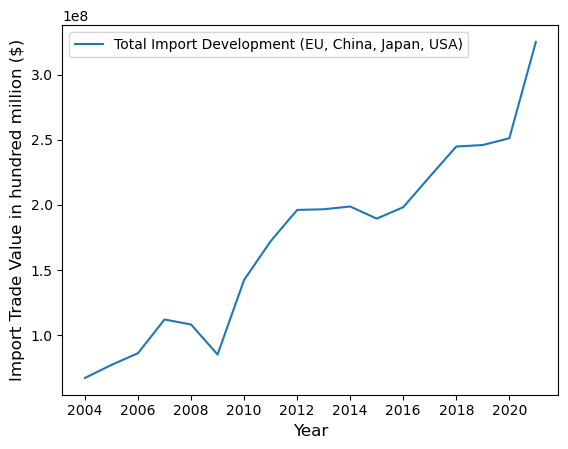

In [21]:
#1) change of import over time 
line_import_mot = subset_import_mot.groupby(["Period"])["Trade Value"].mean().reset_index()


plt.plot(line_import_mot["Period"], line_import_mot["Trade Value"], label = "Total Import Development (EU, China, Japan, USA)")
plt.xlabel("Year", fontsize=12)  #adding the x label
plt.xticks(np.arange(2004,2022,2))
plt.ylabel("Import Trade Value in hundred million ($)", fontsize=12)  #adding the y label
plt.legend()
plt.show()



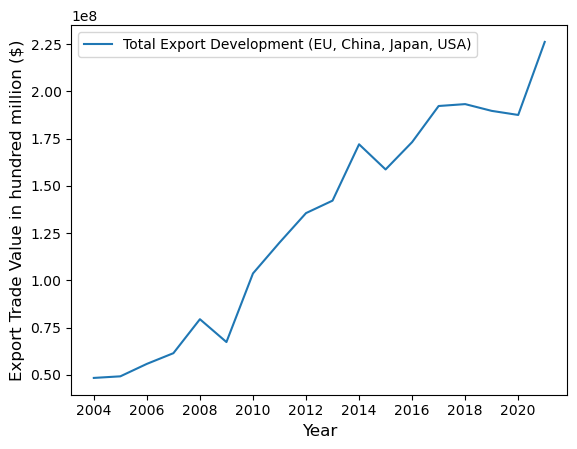

In [22]:
#1) change of export over time 
line_export_mot = subset_export_mot.groupby(["Period"])["Trade Value"].mean().reset_index()


plt.plot(line_export_mot["Period"], line_export_mot["Trade Value"], label = "Total Export Development (EU, China, Japan, USA)")
plt.xlabel("Year", fontsize=12)  #adding the x label
plt.xticks(np.arange(2004,2022,2))
plt.ylabel("Export Trade Value in hundred million ($)", fontsize=12)  #adding the y label
plt.legend()
plt.show()


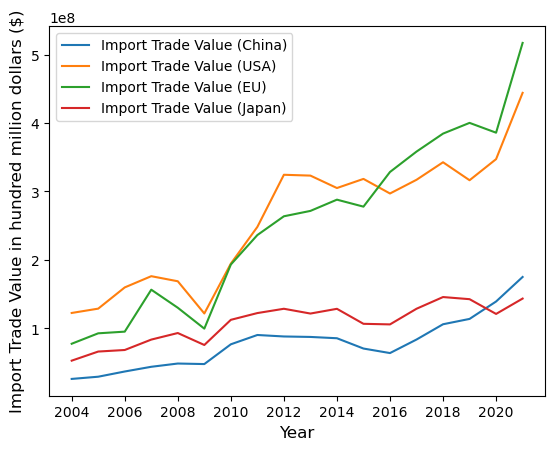

In [23]:
#1) change of import and export over time 
line_import_mot_cn = subset_import_mot.loc[(subset_import_mot["Reporter"] == "China")]
line_import_mot_usa = subset_import_mot.loc[(subset_import_mot["Reporter"] == "USA")]
line_import_mot_eu = subset_import_mot.loc[(subset_import_mot["Reporter"] == "European Union")]
line_import_mot_jp = subset_import_mot.loc[(subset_import_mot["Reporter"] == "Japan")]

line_import_mot_cn = line_import_mot_cn.groupby(["Period"])["Trade Value"].mean().reset_index()
line_import_mot_usa = line_import_mot_usa.groupby(["Period"])["Trade Value"].mean().reset_index()
line_import_mot_eu = line_import_mot_eu.groupby(["Period"])["Trade Value"].mean().reset_index()
line_import_mot_jp = line_import_mot_jp.groupby(["Period"])["Trade Value"].mean().reset_index()

plt.plot(line_import_mot_cn["Period"], line_import_mot_cn["Trade Value"], label = "Import Trade Value (China)")
plt.plot(line_import_mot_usa["Period"], line_import_mot_usa["Trade Value"], label = "Import Trade Value (USA)")
plt.plot(line_import_mot_eu["Period"], line_import_mot_eu["Trade Value"], label = "Import Trade Value (EU)")
plt.plot(line_import_mot_jp["Period"], line_import_mot_jp["Trade Value"], label = "Import Trade Value (Japan)")

plt.xlabel("Year", fontsize=12)  #adding the x label
plt.xticks(np.arange(2004,2022,2))
plt.ylabel("Import Trade Value in hundred million dollars ($)", fontsize=12)  #adding the y label
plt.legend()
plt.show()

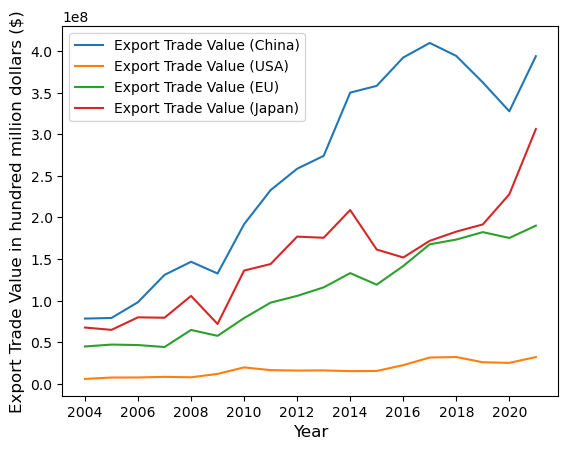

In [24]:
#Eport analyses

line_export_mot_cn = subset_export_mot.loc[(subset_export_mot["Reporter"] == "China")]
line_export_mot_usa = subset_export_mot.loc[(subset_export_mot["Reporter"] == "USA")]
line_export_mot_eu = subset_export_mot.loc[(subset_export_mot["Reporter"] == "European Union")]
line_export_mot_jp = subset_export_mot.loc[(subset_export_mot["Reporter"] == "Japan")]

line_export_mot_cn = line_export_mot_cn.groupby(["Period"])["Trade Value"].mean().reset_index()
line_export_mot_usa = line_export_mot_usa.groupby(["Period"])["Trade Value"].mean().reset_index()
line_export_mot_eu = line_export_mot_eu.groupby(["Period"])["Trade Value"].mean().reset_index()
line_export_mot_jp = line_export_mot_jp.groupby(["Period"])["Trade Value"].mean().reset_index()

plt.plot(line_export_mot_cn["Period"], line_export_mot_cn["Trade Value"], label = "Export Trade Value (China)")
plt.plot(line_export_mot_usa["Period"], line_export_mot_usa["Trade Value"], label = "Export Trade Value (USA)")
plt.plot(line_export_mot_eu["Period"], line_export_mot_eu["Trade Value"], label = "Export Trade Value (EU)")
plt.plot(line_export_mot_jp["Period"], line_export_mot_jp["Trade Value"], label = "Export Trade Value (Japan)")

plt.xlabel("Year", fontsize=12)  #adding the x label
plt.xticks(np.arange(2004,2022,2))
plt.ylabel("Export Trade Value in hundred million dollars ($)", fontsize=12)  #adding the y label
plt.legend()
plt.show()

Question 3) How does the quantity change over time for imports and exports from the main global players?
- in order to illustrate, I will as above create a line graph. I am expecting a similar behavior as the line graph for trade value, since the trade is just expressed in another instrument. 

In [25]:
#Behavior of quantities -> we see NA, therefore must look at the countries first how much NAs we have
print(subset_export_mot[(subset_export_mot["Qty"].isna())].Reporter.value_counts())
print(subset_import_mot[(subset_import_mot["Qty"].isna())].Reporter.value_counts())

subset_export_mot_clean = subset_export_mot.dropna(subset=["Qty"]) #dropping NAN for missing Qty on Exportset
subset_import_mot_clean = subset_import_mot.dropna(subset=["Qty"]) #dropping NAN for missing Qty on importset

print(subset_export_mot_clean)
print(subset_import_mot_clean)

Japan    28
China     6
USA       2
Name: Reporter, dtype: int64
Japan    26
China     9
USA       2
Name: Reporter, dtype: int64
     Period Trade Flow        Reporter            Partner  Commodity Code  \
3      2004          X  European Union              China          850131   
5      2004          X  European Union              Japan          850131   
7      2004          X  European Union  Other Europe, nes          850131   
9      2004          X  European Union                USA          850131   
14     2004          X           China              Japan          850131   
..      ...        ...             ...                ...             ...   
475    2021          X  European Union                USA          850131   
480    2021          X           China              Japan          850131   
482    2021          X           China                USA          850131   
492    2021          X             USA              China          850131   
494    2021          X 

For EXPORT: Now our data set has now only 148 rows left
- Japan misses 28 rows of  data
- China 6
- USA 2

For IMPORT: Now our data set has now only 148 rows left
- Japan misses 26 rows of  data
- China 9
- USA 2

Instead of only looking at the trade value in dollars, I was thinking to check the quanitity of motors. However, we are missing data, especially for Japan, which reduces the credibility for intercountry comparisons. Therefore, I will not include this analyses into the final report.

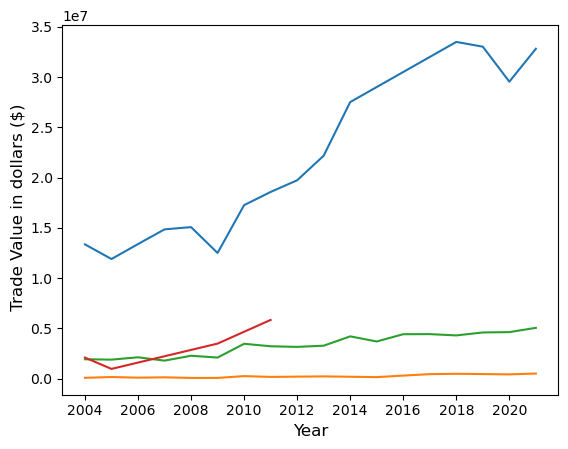

None


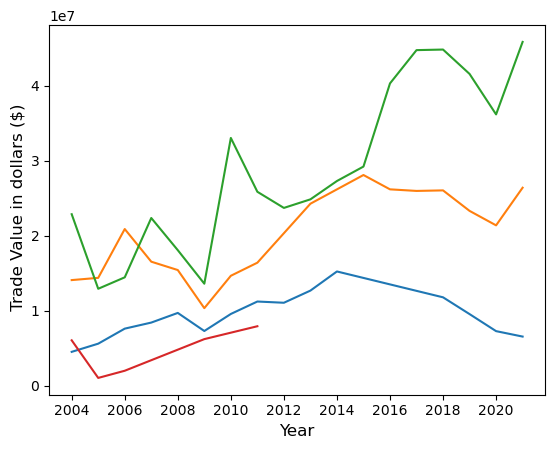

None


In [26]:
#Analyses of quantities exported: 
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
def line_quantity_time (tradeflow,subset,country1, country2,country3,country4, search):
    subset_new_c1 = subset.loc[(subset["Reporter"] == country1)]
    subset_new_c1 = subset_new_c1.groupby(["Period"])[search].mean().reset_index()
    plt.plot(subset_new_c1["Period"], subset_new_c1[search], label = (tradeflow,country1))

    subset_new_c2 = subset.loc[(subset["Reporter"] == country2)]
    subset_new_c2 = subset_new_c2.groupby(["Period"])[search].mean().reset_index()
    plt.plot(subset_new_c2["Period"], subset_new_c2[search], label = (tradeflow,country2))

    subset_new_c3 = subset.loc[(subset["Reporter"] == country3)]
    subset_new_c3 = subset_new_c3.groupby(["Period"])[search].mean().reset_index()
    plt.plot(subset_new_c3["Period"], subset_new_c3[search], label = (tradeflow,country3))

    subset_new_c4 = subset.loc[(subset["Reporter"] == country4)]
    subset_new_c4 = subset_new_c4.groupby(["Period"])[search].mean().reset_index()
    plt.plot(subset_new_c4["Period"], subset_new_c4[search], label = (tradeflow,country4))

    plt.xlabel("Year", fontsize=12)  #adding the x label
    plt.xticks(np.arange(2004,2022,2))
    plt.ylabel(" Trade Value in dollars ($)", fontsize=12)  #adding the y label
 #   plt.yticks.set_major_formatter(FixedOrderFormatter(-9))
    return plt.show()

print (line_quantity_time("Export",subset_export_mot_clean,"China","USA","European Union","Japan","Qty"))

print (line_quantity_time("Import",subset_import_mot_clean,"China","USA","European Union","Japan","Qty"))

Question 4) What are China's main stakeholders today? 
- in order to achieve a deep dive in to Chinese dependencies, I chose a pie chart that illustrates all countries China is importing from and exporting to 

In [42]:
url_1 = r"C:\Users\Charlotte Ahrens\Documents\Documents\GitHub\class_robotics\China_export&import_data.csv"
data1 = pd.read_csv(url_1)
type(data1)

pandas.core.frame.DataFrame

In [43]:
data1

,Period,Trade Flow,Reporter,Partner,2nd Partner,Customs Desc,Transport Mode,Commodity Code,Trade Value,Net Weight(kg),Gross Weight,Qty Unit,Qty,Alternate Quantity unit,Alternate Quantity
0,2021,X,China,Afghanistan,World,TOTAL CPC,TOTAL MOT,850131,144498,9542,NaN,u,7100,u,7100
1,2021,X,China,Albania,World,TOTAL CPC,TOTAL MOT,850131,128885,8482,NaN,u,765,u,765
2,2021,X,China,Algeria,World,TOTAL CPC,TOTAL MOT,850131,973904,118862,NaN,u,117287,u,117287
3,2021,X,China,Andorra,World,TOTAL CPC,TOTAL MOT,850131,214532,787,NaN,u,390,u,390
4,2021,X,China,Angola,World,TOTAL CPC,TOTAL MOT,850131,655015,113918,NaN,u,14524,u,14524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2021,M,China,Ukraine,World,TOTAL CPC,TOTAL MOT,850131,5614,165,NaN,u,100,u,100
249,2021,M,China,North Macedonia,World,TOTAL CPC,TOTAL MOT,850131,3074,15,NaN,u,61,u,61
250,2021,M,China,United Kingdom,World,TOTAL CPC,TOTAL MOT,850131,3460810,30927,NaN,u,6802,u,6802
251,2021,M,China,USA,World,TOTAL CPC,TOTAL MOT,850131,38809497,450635,NaN,u,524910,u,524910


In [44]:
data1.head()

,Period,Trade Flow,Reporter,Partner,2nd Partner,Customs Desc,Transport Mode,Commodity Code,Trade Value,Net Weight(kg),Gross Weight,Qty Unit,Qty,Alternate Quantity unit,Alternate Quantity
0,2021,X,China,Afghanistan,World,TOTAL CPC,TOTAL MOT,850131,144498,9542,NaN,u,7100,u,7100
1,2021,X,China,Albania,World,TOTAL CPC,TOTAL MOT,850131,128885,8482,NaN,u,765,u,765
2,2021,X,China,Algeria,World,TOTAL CPC,TOTAL MOT,850131,973904,118862,NaN,u,117287,u,117287
3,2021,X,China,Andorra,World,TOTAL CPC,TOTAL MOT,850131,214532,787,NaN,u,390,u,390
4,2021,X,China,Angola,World,TOTAL CPC,TOTAL MOT,850131,655015,113918,NaN,u,14524,u,14524


In [45]:
data1.dtypes

Period                       int64
Trade Flow                  object
Reporter                    object
Partner                     object
2nd Partner                 object
Customs Desc                object
Transport Mode              object
Commodity Code               int64
Trade Value                  int64
Net Weight(kg)               int64
Gross Weight               float64
Qty Unit                    object
Qty                          int64
Alternate Quantity unit     object
Alternate Quantity           int64
dtype: object

In [46]:
#creating a new subset, which only includes imports (M) to China
data_import = data1.loc[(data1["Trade Flow"] == "M"), ["Partner","Trade Value"]]
print (data_import)

                  Partner  Trade Value
194             Australia       107276
195               Austria      2022208
196               Belgium       213598
197                Brazil         3174
198              Bulgaria       247920
199              Cambodia        29290
200                Canada       169011
201               Croatia         4995
202               Czechia      7205393
203               Denmark      8145623
204               Estonia         1004
205               Finland        35434
206                France     15376094
207               Germany    178841849
208                Greece         2003
209  China, Hong Kong SAR        55936
210               Hungary     30983756
211             Indonesia      3786365
212               Ireland        85149
213                Israel      2335767
214                 Italy     16598871
215                 Japan    441930268
216         Rep. of Korea     85610925
217             Lithuania         1903
218              Malaysia

In [47]:
#creating a new subset, which only includes exports (X) from China
data_export = data1.loc[(data1["Trade Flow"] == "X"), ["Partner","Trade Value"]]
print (data_export.to_string())

                              Partner  Trade Value
0                         Afghanistan       144498
1                             Albania       128885
2                             Algeria       973904
3                             Andorra       214532
4                              Angola       655015
5                 Antigua and Barbuda         3424
6                          Azerbaijan        45911
7                           Argentina      2781248
8                           Australia     36616850
9                             Austria     29512035
10                            Bahamas         2266
11                            Bahrain       443166
12                         Bangladesh      2679757
13                            Armenia       101112
14                           Barbados         3348
15                            Belgium     23096441
16   Bolivia (Plurinational State of)       107402
17                 Bosnia Herzegovina        86411
18                           Bo

In [48]:
#preparing the dataset for a pie chart - IMPORT
data_import_main = data_import.sort_values(by=["Trade Value"],ascending=False) #sorting the data based on countries with the highest trade values
data_import_main = data_import_main.head(10) # showing the top 10
data_import_main

,Partner,Trade Value
215,Japan,441930268
207,Germany,178841849
245,Switzerland,89154337
216,Rep. of Korea,85610925
239,Viet Nam,44380912
251,USA,38809497
220,"Other Asia, nes",37984780
210,Hungary,30983756
219,Mexico,19087215
214,Italy,16598871


In [49]:
#preparing the dataset for a pie chart - EXPORT
data_export_main = data_export.sort_values(by=["Trade Value"],ascending=False) #sorting the data based on countries with the highest trade values
data_export_main = data_export_main.head(10) # showing the top 10
data_export_main

,Partner,Trade Value
186,USA,524707386
64,Germany,269727978
86,Japan,263005260
156,Viet Nam,226508189
90,Rep. of Korea,192275313
75,"China, Hong Kong SAR",171404432
170,Thailand,171143330
83,Italy,152309287
120,Netherlands,109442705
112,"Other Asia, nes",98823527


In [50]:
#creating a subset with the sum of all countries that are not in the top 10
data_import_summed = data_import.loc[(data_import["Trade Value"] < 10000000)].sum()

data_import_summ= pd.DataFrame({
"Partner": ["Other"],
"Trade Value": [data_import_summed["Trade Value"]]})
print(data_import_summ)


  Partner  Trade Value
0   Other     70483896


In [51]:
#creating a subset with sum of all countries that are not in top 10 
data_export_summed = data_export.loc[(data_export["Trade Value"] < 10000000)].sum()

data_export_summ= pd.DataFrame({
"Partner": ["Other"],
"Trade Value": [data_export_summed["Trade Value"]]})
print(data_export_summ)

  Partner  Trade Value
0   Other    163306187


In [52]:
#adding the sum row to the dataframe 

data_import_pie = pd.concat([data_import_main,data_import_summ])
data_import_pie
#data_import_main.loc["Other"] = data_import_summed["Trade Value"] #this just adds it to the end but doesnt add the "Other" in the right columns, since it sums up all columns -> also the Reporter column


,Partner,Trade Value
215,Japan,441930268
207,Germany,178841849
245,Switzerland,89154337
216,Rep. of Korea,85610925
239,Viet Nam,44380912
251,USA,38809497
220,"Other Asia, nes",37984780
210,Hungary,30983756
219,Mexico,19087215
214,Italy,16598871


In [53]:
#adding the sum row to the dataframe 

data_export_pie = pd.concat([data_export_main,data_export_summ])
data_export_pie

,Partner,Trade Value
186,USA,524707386
64,Germany,269727978
86,Japan,263005260
156,Viet Nam,226508189
90,Rep. of Korea,192275313
75,"China, Hong Kong SAR",171404432
170,Thailand,171143330
83,Italy,152309287
120,Netherlands,109442705
112,"Other Asia, nes",98823527


In [54]:
#creating a pie chart for import

pie_import = px.pie(data_import_pie,               # data frame as input
             values="Trade Value",     # values to create the pie chart (data frame column name)
             names="Partner")          # labels (data frame column name)
                  
pie_import.update_layout(
    title={                                # Add a title, centered on top
        'text': "International imports to China",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})  
pie_import.show()

In [55]:
#creating a pie chart for export

pie_export = px.pie(data_export_pie,               # data frame as input
             values="Trade Value",     # values to create the pie chart (data frame column name)
             names="Partner")          # labels (data frame column name)
                  
pie_export.update_layout(
    title={                             
        'text': "International exports from China",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})  
pie_export.show()